In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick 
from matplotlib.ticker import PercentFormatter 
from matplotlib.ticker import MultipleLocator 
import matplotlib.colors as clr

# Loading the data

In [243]:
train_df = pd.read_csv('archive/aug_train.csv')
test_df = pd.read_csv('archive/aug_test.csv')
train_df.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


# Cleaning the data

In [160]:
#check for nulls
train_df.isna().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [161]:
print (train_df['gender'].unique())
print (train_df['enrolled_university'].unique())
print (train_df['major_discipline'].unique())
print (train_df['experience'].unique())
print (train_df['company_size'].unique())
print (train_df['company_type'].unique())
print (train_df['last_new_job'].unique())

['Male' nan 'Female' 'Other']
['no_enrollment' 'Full time course' nan 'Part time course']
['STEM' 'Business Degree' nan 'Arts' 'Humanities' 'No Major' 'Other']
['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
[nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']
[nan 'Pvt Ltd' 'Funded Startup' 'Early Stage Startup' 'Other'
 'Public Sector' 'NGO']
['1' '>4' 'never' '4' '3' '2' nan]


In [167]:
train_df['gender'].fillna('Not Provided', inplace=True)
train_df['enrolled_university']=train_df['enrolled_university'].apply(lambda x:'No Enrollment' if x=='no_enrollment' else x)
train_df['major_discipline'].fillna('Unknown', inplace=True)
train_df['experience']=train_df['experience'].apply(lambda x:'0' if x=='<1' else x)
train_df['experience']=train_df['experience'].apply(lambda x:'20' if x=='>20' else x)
train_df['company_size'].fillna('0', inplace=True)
train_df['company_size']=train_df['company_size'].apply(lambda x:'10-49' if x=='10/49' else x)
train_df['company_type']=train_df['last_new_job'].apply(lambda x:'Never' if x=='never' else x)

# repeat steps on test set
test_df['gender'].fillna('Not Provided', inplace=True)
test_df['enrolled_university']=test_df['enrolled_university'].apply(lambda x:'No Enrollment' if x=='no_enrollment' else x)
test_df['major_discipline'].fillna('Unknown', inplace=True)
test_df['experience']=test_df['experience'].apply(lambda x:'0' if x=='<1' else x)
test_df['experience']=test_df['experience'].apply(lambda x:'20' if x=='>20' else x)
test_df['company_size'].fillna('0', inplace=True)
test_df['company_size']=test_df['company_size'].apply(lambda x:'10-49' if x=='10/49' else x)
test_df['company_type']=test_df['last_new_job'].apply(lambda x:'Never' if x=='never' else x)


In [168]:
#drop the remaining missing data
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)
train_df.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [169]:
# convert objects to integers
train_df['experience'] = train_df['experience'].astype(str).astype(int)
test_df['experience'] = test_df['experience'].astype(str).astype(int)

train_df['training_hours'] = train_df['training_hours'].astype(str).astype(int)
test_df['training_hours'] = test_df['training_hours'].astype(str).astype(int)

In [186]:
# order the categorical variables
gender_order = ['Male','Female','Other','Not provided']
ed_order = ['Primary School','High School','Graduate','Masters','Phd']
disc_order = ['STEM','Unknown','Humanities','Other','Business Degree','Arts','No Major']
exp_yrs_order = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
size_order = ['0','<10', '10-49', '50-99', '100-500', '500-999', '1000-4999', '5000-9999', '10000+']
company_order = ['Pvt Ltd','Unknown','Funded Startup','Public Sector','Early Stage Startup','NGO','Other']
enroll_order = ['No Enrollment','Part time course','Full time course']
job_order = ['Never', '1', '2', '3', '4', '>4']
exp_order =['No relevant experience','Has relevant experience']

# Data Visualization

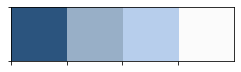

In [206]:
sns.palplot(['#2B547E','#98AFC7','#B7CEEC','#fbfbfb'])

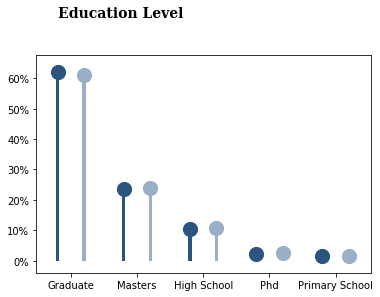

In [214]:
#EDUCATION LEVEL
train_graph_temp_df = pd.DataFrame(train_df["education_level"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["education_level"].apply(lambda x: x/sum(train_graph_temp_df["education_level"])*100)
test_graph_temp_df = pd.DataFrame(test_df["education_level"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["education_level"].apply(lambda x: x/sum(test_graph_temp_df["education_level"])*100)
fig, ax = plt.subplots()
ax.bar(np.arange(len(train_graph_temp_df.index)), height=train_graph_temp_df["Percentage"], zorder=3, color="#2B547E", width=0.05)
ax.scatter(np.arange(len(train_graph_temp_df.index)), train_graph_temp_df["Percentage"], zorder=3,s=200, color="#2B547E")
ax.bar(np.arange(len(test_graph_temp_df.index))+0.4, height=test_graph_temp_df["Percentage"], zorder=3, color="#98AFC7", width=0.05)
ax.scatter(np.arange(len(test_graph_temp_df.index))+0.4, test_graph_temp_df["Percentage"], zorder=3,s=200, color="#98AFC7")

ax.text(0, 80, 'Education Level', fontsize=14, fontweight='bold', fontfamily='serif')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_locator(mtick.MultipleLocator(10))
ax.set_xticks(np.arange(len(train_graph_temp_df.index))+0.4/2 )
ax.set_xticklabels(list(train_graph_temp_df.index),rotation=0)
ax.tick_params()

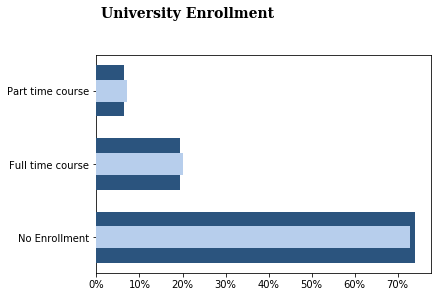

In [215]:
#ENROLLED IN UNIVESITY
train_graph_temp_df = pd.DataFrame(train_df["enrolled_university"].value_counts(normalize=True))
train_graph_temp_df["Percentage"] = train_graph_temp_df["enrolled_university"].apply(lambda x: x/sum(train_graph_temp_df["enrolled_university"])*100)


test_graph_temp_df = pd.DataFrame(test_df["enrolled_university"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["enrolled_university"].apply(lambda x: x/sum(test_graph_temp_df["enrolled_university"])*100)

fig, ax = plt.subplots()
ax.text( 1, 3,'University Enrollment', fontsize=14, fontweight='bold', fontfamily='serif')
ax.barh(train_graph_temp_df.index, train_graph_temp_df['Percentage'], color="#2B547E", zorder=3, height=0.7)
ax.barh(test_graph_temp_df.index, test_graph_temp_df['Percentage'], color="#B7CEEC", zorder=3, height=0.3)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.xaxis.set_major_locator(mtick.MultipleLocator(10))

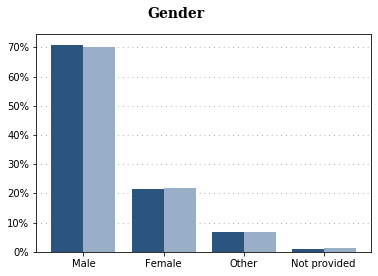

In [217]:
#GENDER
train_graph_temp_df = pd.DataFrame(train_df["gender"].value_counts(normalize=True))
train_graph_temp_df["Percentage"] = train_graph_temp_df["gender"].apply(lambda x: x/sum(train_graph_temp_df["gender"])*100)


test_graph_temp_df = pd.DataFrame(test_df["gender"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["gender"].apply(lambda x: x/sum(test_graph_temp_df["gender"])*100)


fig, ax = plt.subplots()
x = np.arange(len(train_graph_temp_df))
ax.text(1, 80, 'Gender', fontsize=14, fontweight='bold', fontfamily='serif')
ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax.bar(x, height=train_graph_temp_df["Percentage"], zorder=3, color="#2B547E", width=0.4)
ax.bar(x+0.4, height=test_graph_temp_df["Percentage"], zorder=3, color="#98AFC7", width=0.4)
ax.set_xticks(x+0.4/2 )
ax.set_xticklabels(['Male','Female','Other','Not provided'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_locator(mtick.MultipleLocator(10))

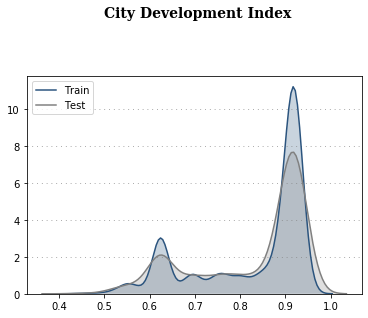

In [221]:
#CDI
fig, ax = plt.subplots()
ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
train_graph_temp_df = pd.DataFrame(train_df["city_development_index"])
test_graph_temp_df = pd.DataFrame(test_df["city_development_index"])
sns.kdeplot(train_graph_temp_df["city_development_index"],color="#2B547E", shade=True, label="Train")
sns.kdeplot(test_graph_temp_df["city_development_index"],color="gray", shade=True, label="Test")
ax.text(0.5, 15,'City Development Index', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax.yaxis.set_major_locator(mtick.MultipleLocator(2))

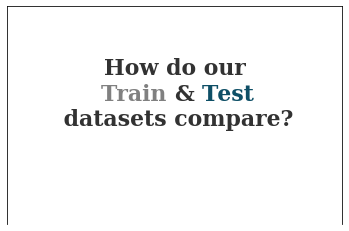

In [196]:
#TITLE
fig, ax = plt.subplots()
ax.spines["bottom"].set_visible(False)
ax.tick_params(left=False, bottom=False)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(0.5, 0.6, 'How do our\n\n datasets compare?', horizontalalignment='center', verticalalignment='center',
         fontsize=22, fontweight='bold', fontfamily='serif', color="#323232")

ax.text(0.28,0.57,"Train", fontweight="bold", fontfamily='serif', fontsize=22, color='gray')
ax.text(0.5,0.57,"&", fontweight="bold", fontfamily='serif', fontsize=22, color='#323232')
ax.text(0.58,0.57,"Test", fontweight="bold", fontfamily='serif', fontsize=22, color='#0e4f66')
ax.tick_params()

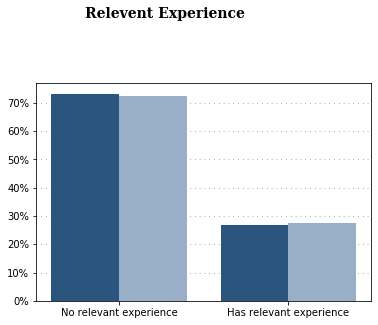

In [223]:
#RELEVANT EXPERIENCE
train_graph_temp_df = pd.DataFrame(train_df["relevent_experience"].value_counts(normalize=True))
train_graph_temp_df["Percentage"] = train_graph_temp_df["relevent_experience"].apply(lambda x: x/sum(train_graph_temp_df["relevent_experience"])*100)


test_graph_temp_df = pd.DataFrame(test_df["relevent_experience"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["relevent_experience"].apply(lambda x: x/sum(test_graph_temp_df["relevent_experience"])*100)


fig, ax = plt.subplots()
x = np.arange(len(train_graph_temp_df))
ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax.text(0, 100, 'Relevent Experience', fontsize=14, fontweight='bold', fontfamily='serif')
ax.bar(x, height=train_graph_temp_df["Percentage"], zorder=3, color="#2B547E", width=0.4)
ax.bar(x+0.4, height=test_graph_temp_df["Percentage"], zorder=3, color="#98AFC7", width=0.4)
ax.set_xticks(x+0.4/2 )
ax.set_xticklabels(['No relevant experience','Has relevant experience'])
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_locator(mtick.MultipleLocator(10))

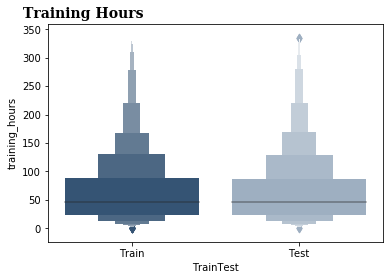

In [227]:
#TRAINING HOURS
fig, ax = plt.subplots()
train_graph_temp_df = pd.DataFrame(train_df["training_hours"])
train_graph_temp_df["TrainTest"] = "Train"
test_graph_temp_df = pd.DataFrame(test_df["training_hours"])
test_graph_temp_df["TrainTest"] = "Test"
ax.text(-0.65, 370, 'Training Hours', fontsize=14, fontweight='bold', fontfamily='serif')
comb_graph_temp_df = pd.concat([train_graph_temp_df, test_graph_temp_df], axis=0)
sns.boxenplot(y="training_hours", x="TrainTest", data=comb_graph_temp_df, palette=["#2B547E", "#98AFC7"])
ax.tick_params()

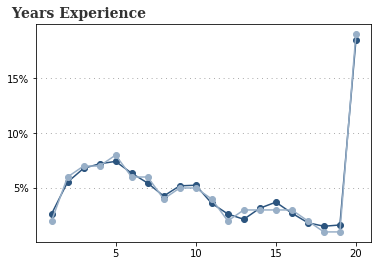

In [228]:
# Ax7 - EXPERIENCE YRS
train_graph_temp_df = pd.DataFrame(train_df["experience"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["experience"].apply(lambda x: x/sum(train_graph_temp_df["experience"])*100)
train_graph_temp_df = train_graph_temp_df.loc[exp_yrs_order]
test_graph_temp_df = pd.DataFrame(test_df["experience"].value_counts())
test_graph_temp_df["Percentage"] = round(test_graph_temp_df["experience"].apply(lambda x: x/sum(test_graph_temp_df["experience"])*100),).astype(int)
test_graph_temp_df = test_graph_temp_df.loc[exp_yrs_order]
fig,ax=plt.subplots()
ax.grid(color='gray', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
ax.plot(train_graph_temp_df.index, train_graph_temp_df["Percentage"], zorder=3, color="#2B547E", marker='o')
ax.plot(test_graph_temp_df.index, test_graph_temp_df["Percentage"], zorder=3, color="#98AFC7", marker='o')
ax.text(-1.5, 20.5, 'Years Experience', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")

ax.set_yticklabels(labels = ['0   ', '5%','10%','15%'])
ax.xaxis.set_major_locator(mtick.MultipleLocator(5))
ax.yaxis.set_major_locator(mtick.MultipleLocator(5))

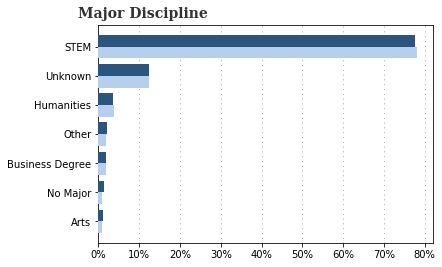

In [229]:
#MAJOR DISCIPLINE
train_graph_temp_df = pd.DataFrame(train_df["major_discipline"].value_counts())
train_graph_temp_df["Percentage"] = train_graph_temp_df["major_discipline"].apply(lambda x: x/sum(train_graph_temp_df["major_discipline"])*100)
test_graph_temp_df = pd.DataFrame(test_df["major_discipline"].value_counts())
test_graph_temp_df["Percentage"] = test_graph_temp_df["major_discipline"].apply(lambda x: x/sum(test_graph_temp_df["major_discipline"])*100)

fig, ax = plt.subplots()
ax.grid(color='gray', linestyle=':', axis='x', zorder=0,  dashes=(1,5))
ax.barh(np.arange(len(train_graph_temp_df.index)), train_graph_temp_df["Percentage"], zorder=3, color="#2B547E", height=0.4)
ax.barh(np.arange(len(test_graph_temp_df.index))+0.4, test_graph_temp_df["Percentage"], zorder=3, color="#B7CEEC", height=0.4)
ax.text(-5, -0.8, 'Major Discipline', 
         fontsize=14, fontweight='bold', fontfamily='serif', color="#323232")
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
ax.yaxis.set_major_locator(mtick.MultipleLocator(1))
ax.set_yticks(np.arange(len(test_graph_temp_df.index))+0.4 / 2)
ax.set_yticklabels(list(test_graph_temp_df.index))
ax.invert_yaxis()

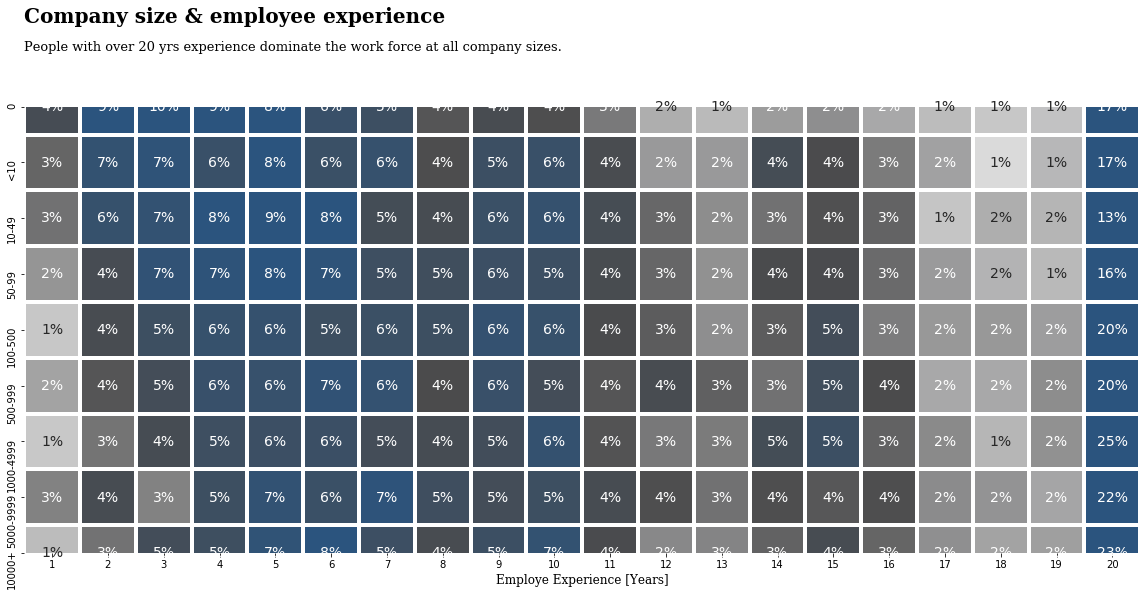

In [230]:
ct_gen_size = pd.crosstab(train_df['company_size'],train_df['experience'], normalize='index').loc[size_order,exp_yrs_order]
# Setting up figure and axes
fig = plt.figure(figsize=(20,20)) 
gs = fig.add_gridspec(2, 1)
gs.update(wspace=0, hspace=-0.09)
ax = fig.add_subplot(gs[:,:])

colors = ["#fbfbfb", "#4b4b4c","#2B547E"]
colormap = clr.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(data=ct_gen_size, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=True, fmt='1.0%',annot_kws={"fontsize":14})


ax.set_xlabel("Employe Experience [Years]",fontfamily='serif',fontsize=12)
ax.text(0, -0.5, 
         'People with over 20 yrs experience dominate the work force at all company sizes.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
ax.set_ylabel("") 
ax.text(0, -1, 
         'Company size & employee experience', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )
ax.tick_params()

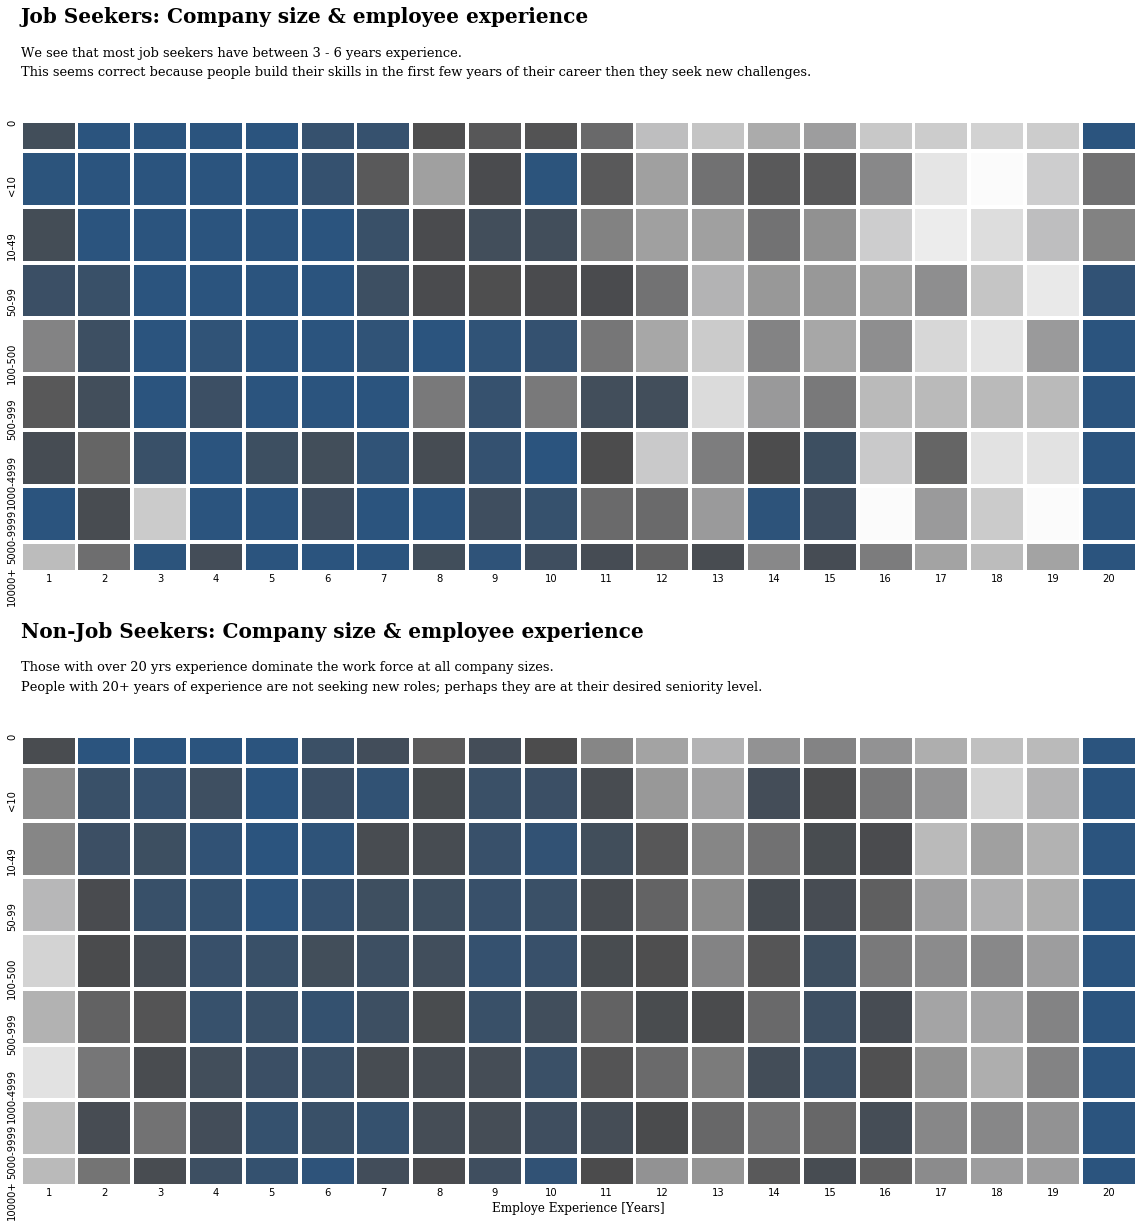

In [231]:
job_hunt_only = train_df[train_df['target']==1]
no_job_hunt_only = train_df[train_df['target']==0]

job_seek = pd.crosstab(job_hunt_only['company_size'],job_hunt_only['experience'], normalize='index').loc[size_order,exp_yrs_order]
no_seek = pd.crosstab(no_job_hunt_only['company_size'],no_job_hunt_only['experience'], normalize='index').loc[size_order,exp_yrs_order]
# Setting up figure and axes
fig = plt.figure(figsize=(20,20))
gs = fig.add_gridspec(2, 3)
gs.update(wspace=0.2, hspace=0.3)
ax0 = fig.add_subplot(gs[0,:])
ax1 = fig.add_subplot(gs[1,:])

colors = ["#fbfbfb", "#4b4b4c","#2B547E"]
colormap = clr.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=job_seek, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=False, fmt='1.0%',annot_kws={"fontsize":14})
sns.heatmap(ax=ax1, data=no_seek, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=False, fmt='1.0%',annot_kws={"fontsize":14})


ax0.set_xlabel("")
ax0.set_ylabel("")
ax0.text(0, -1.3, 
         'Job Seekers: Company size & employee experience', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )
ax0.text(0, -0.7, 
         'We see that most job seekers have between 3 - 6 years experience.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
ax0.text(0, -0.35, 
         'This seems correct because people build their skills in the first few years of their career then they seek new challenges.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
ax1.set_xlabel("Employe Experience [Years]",fontfamily='serif',fontsize=12)
ax1.set_ylabel("")
ax1.text(0, -1.3, 
         'Non-Job Seekers: Company size & employee experience', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )
ax1.text(0, -0.7, 
         'Those with over 20 yrs experience dominate the work force at all company sizes.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )
ax1.text(0, -0.35, 
         'People with 20+ years of experience are not seeking new roles; perhaps they are at their desired seniority level.', 
         fontsize=13, 
         fontweight='light', 
         fontfamily='serif',
        )

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)


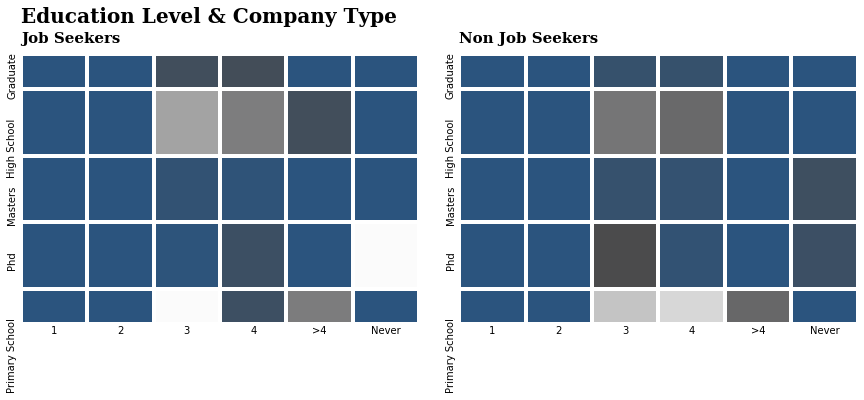

In [232]:
job_hunt_only = train_df[train_df['target']==1]
no_job_hunt_only = train_df[train_df['target']==0]

job_seek = pd.crosstab(job_hunt_only['education_level'],job_hunt_only['company_type'], normalize='index')
no_seek = pd.crosstab(no_job_hunt_only['education_level'],no_job_hunt_only['company_type'], normalize='index')


###
fig = plt.figure(figsize=(15,15))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.1, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])

colors = ["#fbfbfb", "#4b4b4c","#2B547E"]
colormap = clr.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(ax=ax0, data=job_seek, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=False, fmt='1.0%',annot_kws={"fontsize":14})
sns.heatmap(ax=ax1, data=no_seek, linewidths=.1, vmin=0, vmax=0.075,
            square=True, cbar_kws={"orientation": "horizontal"}, cbar=False, cmap=colormap,linewidth=3, annot=False, fmt='1.0%',annot_kws={"fontsize":14})
ax0.set_xlabel("")
ax0.set_ylabel("")
ax1.set_xlabel("")
ax1.set_ylabel("")

ax0.text(0, 0, 
         'Education Level & Company Type', 
         fontsize=20, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.text(0, 0.3, 
         'Job Seekers', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax1.text(0, 0.3, 
         'Non Job Seekers', 
         fontsize=15, 
         fontweight='bold', 
         fontfamily='serif',
        )

ax0.tick_params(axis=u'both', which=u'both',length=0)
ax1.tick_params(axis=u'both', which=u'both',length=0)